# Sentiment Analysis !

[nltk_data] Downloading package stopwords to /Users/admin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


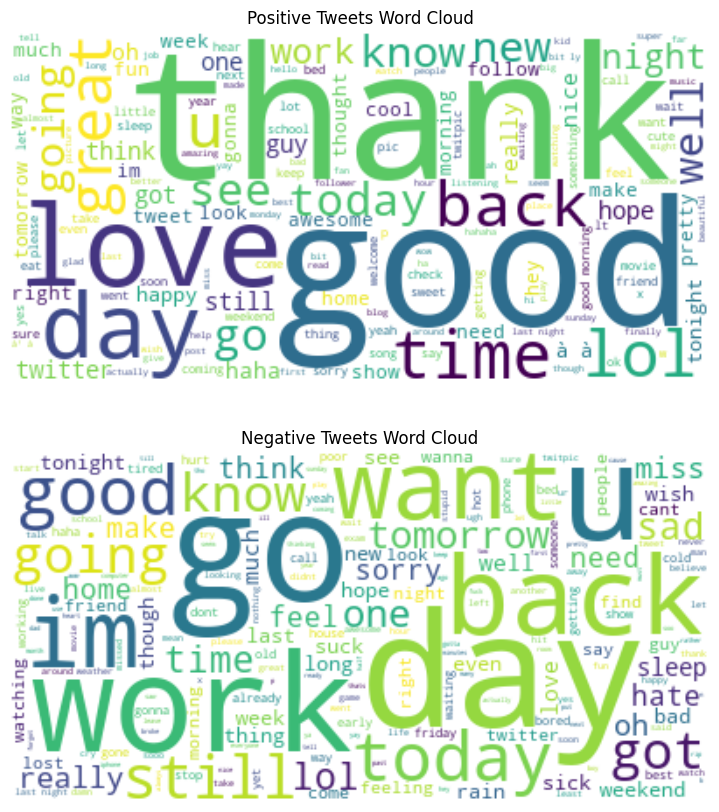

In [1]:
# import field
from nltk.corpus import stopwords
import re
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

### data load
df = pd.read_csv('tweets.csv', encoding='latin1', header = None)

### process text

# stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stop_words.update({'quot', 'amp'})

def process_text(text):
    # 텍스트 소문자로 변환
    text = text.lower()
    # 특수문자, 숫자 제거
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    # 불용어 제거 => ' '으로 구분된 통 스트링
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# processed_text 컬럼 생성
df['processed_text'] = df[5].apply(process_text)

### 워드 클라우드 


sample_size = 1000  # 샘플링할 트윗 수

# 샘플링
positive_sample = df[df[0] == 4].sample(sample_size, random_state=1)
negative_sample = df[df[0] == 0].sample(sample_size, random_state=1)

# 각각의 워드 클라우드 생성
positive_wordcloud = WordCloud(max_words=200, background_color="white", stopwords=STOPWORDS).generate(' '.join(positive_sample['processed_text']))
negative_wordcloud = WordCloud(max_words=200, background_color="white", stopwords=STOPWORDS).generate(' '.join(negative_sample['processed_text']))


# plot
plt.figure(figsize=(20,10))
# positive plot
plt.subplot(2,1,1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Tweets Word Cloud')
plt.axis("off")
# negative plot
plt.subplot(2,1,2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Tweets Word Cloud')
plt.axis("off")

plt.show()

In [2]:
positive_wordcloud.words_

{'thank': 1.0,
 'good': 0.9166666666666666,
 'love': 0.7976190476190477,
 'day': 0.6428571428571429,
 'time': 0.5595238095238095,
 'lol': 0.5357142857142857,
 'back': 0.5119047619047619,
 'great': 0.47619047619047616,
 'u': 0.4642857142857143,
 'today': 0.4523809523809524,
 'see': 0.44047619047619047,
 'go': 0.44047619047619047,
 'know': 0.40476190476190477,
 'going': 0.39285714285714285,
 'new': 0.38095238095238093,
 'well': 0.36904761904761907,
 'night': 0.35714285714285715,
 'work': 0.35714285714285715,
 'twitter': 0.35714285714285715,
 'got': 0.35714285714285715,
 'one': 0.3333333333333333,
 'guy': 0.32142857142857145,
 'hope': 0.30952380952380953,
 'still': 0.30952380952380953,
 'think': 0.30952380952380953,
 'nice': 0.2857142857142857,
 'really': 0.2857142857142857,
 'oh': 0.2857142857142857,
 'haha': 0.2857142857142857,
 'tonight': 0.2619047619047619,
 'happy': 0.2619047619047619,
 'à à': 0.2619047619047619,
 'right': 0.23809523809523808,
 'awesome': 0.23809523809523808,
 'look'

In [13]:
# 배포용을 위한 작은 데이터셋 만들기 !

### data load
df = pd.read_csv('tweets.csv', encoding='latin1', header = None)

sample_size = 4000
positive_sample = df[df[0] == 4].sample(sample_size, random_state=1)
negative_sample = df[df[0] == 0].sample(sample_size, random_state=1)

# 샘플데이터 셋 만들기
df_sample = pd.concat([positive_sample, negative_sample])

df_sample.to_csv('tweets_sample.csv', index=None)

# Article Review !

### Predicting Election Results from Twitter Using Machine Learning Algorithms

- 소셜 미디어 사용자의 정치적 성향을 분석, 선거 결과 예측 전략 제안
- 트윗 데이터셋, SVM - 15 folds cross validaition 이용 -> 94.2퍼센트의 정확도
- 주어진 베이스 라인에서 94.2퍼센트의 정확도로 선거 결과를 예측할 수 있음을 나타냄
- 출구조사 등 기존 전략과 비교하여 소셜 미디어 데이터가 더 정확하게 예측할 수 있음을 보여줌

## 감상

### 자발적 매체 > 수동적 매체

- 소셜 미디어 데이터가 기존의 전략보다 더 정확하게 예측할 수 있다는 결과 => 자발적 매체(트위터)가 수동적 매체(여론조사, 출구조사)보다 강력할 수 있다는 것에 대한 반증

- 사용자들이 자발적으로 의견을 표현하기 때문에 보다 진술하고 직관적인 감정을 반영할 수 있지 않을까?

- 더 큰 의미를 가지는 데이터

### 해당 연구에 대한 의구심

- 어떤 방식으로 연구를 진행하였는지에 대해 이해가 잘 안됨

- 실험 결과와 결론의 연결 또한 이해가 잘 가지 않음
    - 0.942의 정확도가 감정에 대한 예측인 것인가? 선거 결과에 대한 예측인가?
    - 전자라면, 어떻게 "94.2퍼센트의 정확도로 선거 결과를 예측할 수 있음"이라는 결론을 지을 수 있을까?
    - 후자라면, 어떤 방식으로 연구를 진행했길래 ... ?


# Word Cloud - Logic

###### https://amueller.github.io/word_cloud/_modules/wordcloud/wordcloud.html#WordCloud.__init__

## 큰 틀의 작동 방식

1. 단어의 빈도 수 계산
2. 빈도 수를 기반으로 단어의 크기를 결정
3. 단어 배치
    - 기본적으로 중앙에서 시작하여 바깥쪽으로 
4. 이미지 생성

## .generate(str) vs .generate_from_frequencies(dict)

- 놀랍게도 두 메서드는 다른 결과를 반환함 !

- 토크나이즈 과정에 차이가 있음

### .generate(str) = .generate_from_text(str)
- str을 문자열로 입력으로 받음
- **내부적**으로 텍스트를 토큰화하고 각 단어의 빈도수를 계산
    - 이는 내부의 process_text 메서드를 거침
        - process_text 과정

        0. 정규표현식을 사용한 Tokenize => 이 과정에서 단순히 공백을 기준으로 토크나이즈하는 것이 아님 !

            - ` pattern = r"\w[\w']*" if self.min_word_length <= 1 else r"\w[\w']+" `

            - 해당 패턴을 기준으로 단어를 토크나이즈
        
        1. remove 's
        2. remove number
        3. remove short words
        4. remove stop words
    
    - 그리고 generate_from_frequency를 호출함

### generate_from_frequencies(dict)

- 단어 빈도 딕셔너리를 입력으로 받아 wordcloud를 시각화